# 2D GPR Derivatives Demo

In [1]:
import sys
sys.path.insert(0,'/home/emmanuel/projects/2019_sakame')

In [2]:
import numpy as np
from src.data.make_dataset import ToyData2D
from src.models.regression import gpr_naive
from src.models.derivatives import GPRDerivative
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

%load_ext autoreload
%autoreload 2

### Custom Function I

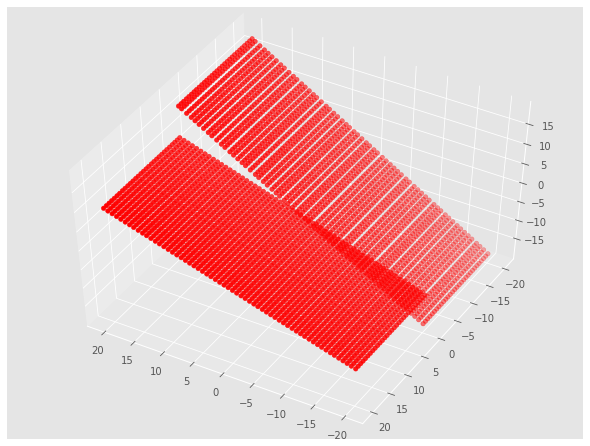

In [48]:
# Raw Data

data_model = ToyData2D(func='custom3', num_points=60)

data_model.plot_raw(demo=False);

X, y = data_model.regress_f()

#### Training and Testing

In [17]:
X.shape, y.shape

((3600, 2), (3600,))

In [39]:
train_size = 0.03
xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, train_size=train_size, random_state=1234
)

In [40]:
xtrain.shape, xtest.shape

((108, 2), (3492, 2))

### Train GP

In [41]:
gpr_model = gpr_naive(
    xtrain, 
    ytrain, 
    n_restarts_optimizer=10, 
    normalize_y=True, 
    random_state=123
)


In [42]:
# Get Predictions
ypred = gpr_model.predict(X, return_std=False)

### Visualization - Predictions

(108, 2) (3600,)


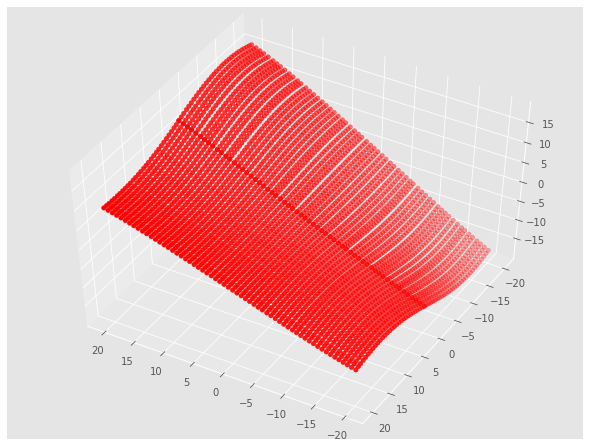

In [43]:
print(xtrain.shape, ypred.shape)
data_model.plot_predictions(X, ypred, demo=False)

### Derivative

In [44]:
gpr_der = GPRDerivative(gpr_model)

x_der = gpr_der(X)

#### Visualization - Derivative

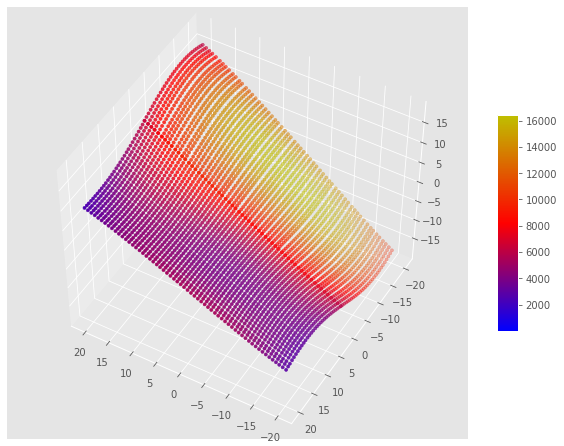

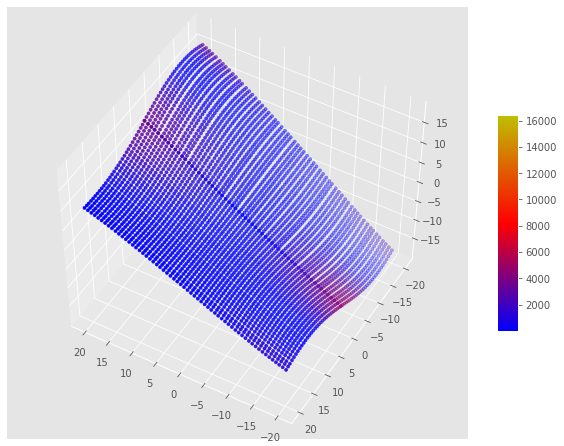

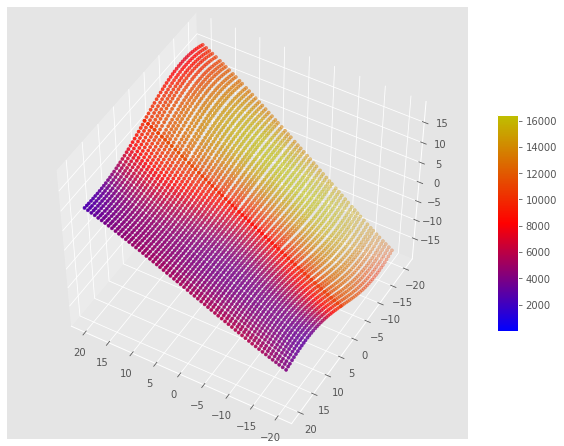

In [45]:
data_model.plot_sensitivity(X, ypred, x_der, demo=False)

### Sensitivity

In [33]:

sensX = np.abs(x_der)

#### Visualization - Sensitivity

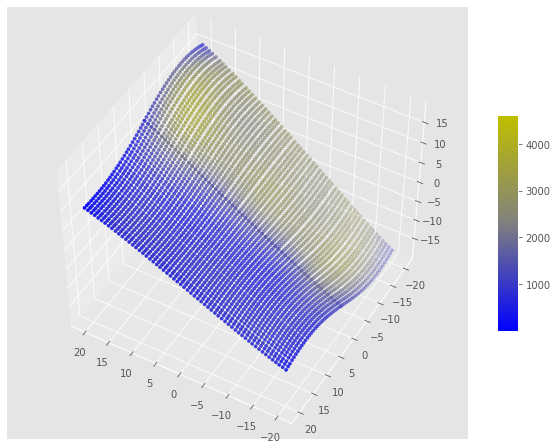

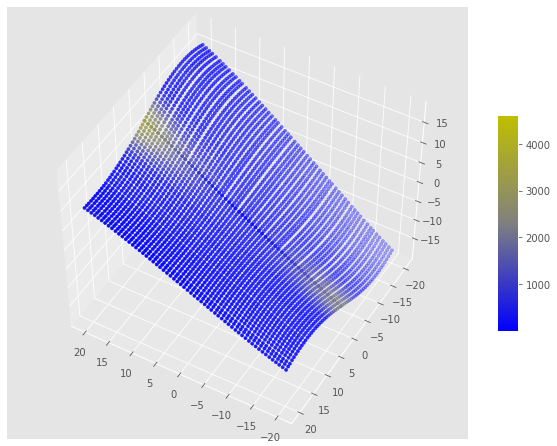

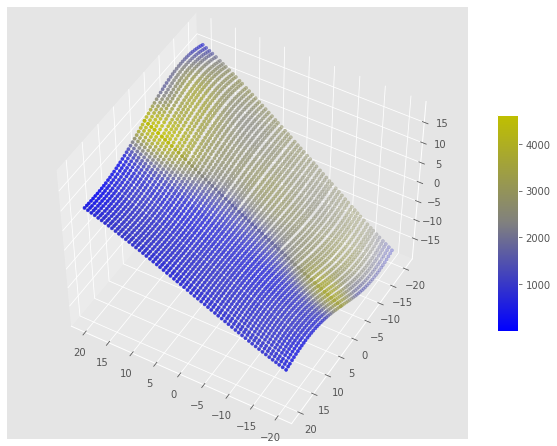

In [49]:
data_model.plot_sensitivity(X, ypred, sensX, demo=False)